# Image processing with convolutions

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datasets import load_dataset
from PIL import Image
import imageio as iio

c:\Users\asale\Manim snippets\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading in the data

In [10]:
mnist = load_dataset("ylecun/mnist")

train = mnist["train"]
test  = mnist["test"]

In [11]:
X_train = np.stack([np.array(ex["image"]) for ex in train])
y_train = np.array([ex["label"] for ex in train])

X_test  = np.stack([np.array(ex["image"]) for ex in test])
y_test  = np.array([ex["label"] for ex in test])

print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


We can access the greyscale pixel values that make up any individual image. The values range from 0 to 255, where 0 is full black and 255 is full white.

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We can also plot the raw images to see what they look like:

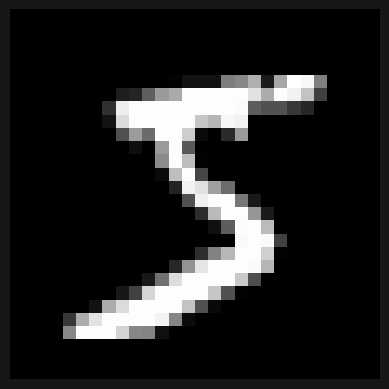

5


In [13]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

# Set text and bar edges to white for readability
params = {"ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "#161718",
        "axes.edgecolor" : "#161718"}
plt.rcParams.update(params)

plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()
print(y_train[0])

Here is a comparison between what we (humans) can see and what the computer sees:

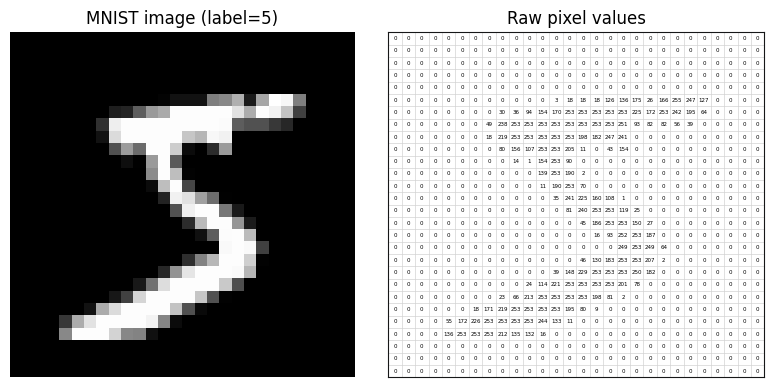

In [14]:
img = X_train[0].astype(int)  # Raw integers

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Left: normal image
axes[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axes[0].set_title(f"MNIST image (label={y_train[0]})")
axes[0].axis("off")

# Right: raw integer grid only
ax = axes[1]
ax.set_xlim(-0.5, 27.5)
ax.set_ylim(27.5, -0.5)   # invert y so row 0 is at top like the image
ax.set_xticks(np.arange(-0.5, 28, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 28, 1), minor=True)
ax.grid(which="minor", color="lightgray", linestyle='-', linewidth=0.5)
ax.set_xticks([]); ax.set_yticks([])
ax.set_facecolor("white")
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        val = img[i, j]
        ax.text(j, i, f"{val}", ha="center", va="center", fontsize=4, color='black')

ax.set_title("Raw pixel values")
plt.tight_layout()
plt.show()

# Function setup

In [ ]:
def single_convolution(image_subset, kernel):
    """
    Apply a kernel to an input image subset.
    """
    return np.sum(np.multiply(image_subset, kernel))

def convolution2d(image, kernel, stride=1, padding=0):
    """
    Apply a 2D convolution between the input image and kernel.
    This code provides a brute-force version of the computations.
    """
    # For general kernel size
    filter_height = kernel.shape[0]
    filter_width  = kernel.shape[1]
    
    # Prep output
    filtered_image = np.ndarray(shape=(image.shape[0] - filter_height + 1, 
                                       image.shape[1] - filter_width + 1))
    
    for row in range(filtered_image.shape[0]):
        for col in range(filtered_image.shape[1]):
            # Select next subset of image to convolve kernel with
            patch = image[row:(row + filter_height), 
                          col:(col + filter_width)]

            # Apply the convolution operation
            ms = single_convolution(patch, kernel)
            
            # Store the result in the output
            filtered_image[row, col] = ms
            
    return filtered_image

In [16]:
def plot_conv_result(filtered_image):
    """
    Display the result of the convolution.
    """
    # Set background to match dark theme
    plt.figure(facecolor='#161718')
    
    # Set text and bar edges to white for readability
    params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
    plt.rcParams.update(params)
    
    im = plt.imshow(filtered_image, cmap='gray')
    plt.colorbar(im)
    plt.axis('off')
    plt.show()

For future use, we can invoke both functions with the following:

In [28]:
def apply_kernel(image, kernel):
    """
    Apply a kernel to an input image and return the filtered image.
    """
    filtered_image = convolution2d(image, kernel)
    plot_conv_result(filtered_image)

## Verifying convolution calculations

In [3]:
convolution2d(
    np.array([
        [2,5,6],
        [1,4,-3],
        [7,0,1]
    ]),

    np.array([
        [1,-1],
        [2,3]
    ])
)

array([[11., -2.],
       [11., 10.]])

In [4]:
convolution2d(
    np.array([
        [0,0,0,0,0],
        [0,2,5,6,0],
        [0,1,4,-3,0],
        [0,7,0,1,0],
        [0,0,0,0,0]
    ]),

    np.array([
        [1,-1],
        [2,3]
    ])
)

array([[ 6., 19., 28., 12.],
       [ 1., 11., -2.,  0.],
       [20., 11., 10., -1.],
       [-7.,  7., -1.,  1.]])

In [5]:
convolution2d(
    np.array([
        [0,0,0,0,0],
        [0,2,5,6,0],
        [0,1,4,-3,0],
        [0,7,0,1,0],
        [0,0,0,0,0]
    ]),

    np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])
)

array([[-9.,  0.,  9.],
       [-9.,  6.,  9.],
       [-4., 10.,  4.]])

In [6]:
convolution2d(
    np.array([
        [0,0,0,0,0],
        [0,2,5,6,0],
        [0,1,4,-3,0],
        [0,7,0,1,0],
        [0,0,0,0,0]
    ]),

    np.array([
        [-1, 1, 1],
        [1, -1, 0],
        [0, 0, 1]
    ])
)

array([[ 2., -6., -1.],
       [ 6.,  7.,  8.],
       [-2.,  7., -8.]])

In [8]:
convolution2d(
    np.array([
        [0,0,0,0,0],
        [0,9,6,2,0],
        [0,2,1,0,0],
        [0,6,5,5,0],
        [0,0,0,0,0]
    ]),

    np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [0, 0, 0]
    ])
)

array([[ -3., -13.,  -8.],
       [ 14.,  14.,   7.],
       [  2.,  -3.,  -9.]])

In [9]:
convolution2d(
    np.array([
        [0,0,0,0,0],
        [0,3,1,2,0],
        [0,5,2,-3,0],
        [0,1,-1,2,0],
        [0,0,0,0,0]
    ]),

    np.array([
        [1, -1, -1],
        [1, 0, 1],
        [1, 0, 2]
    ])
)

array([[ 5.,  4.,  3.],
       [-4.,  7.,  0.],
       [-8.,  9.,  4.]])

# Prewitt kernels

In [10]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Convolve the kernel with the first MNIST image
filtered_image = convolution2d(X_train[0], kernel)

In [11]:
filtered_image.shape

(26, 26)

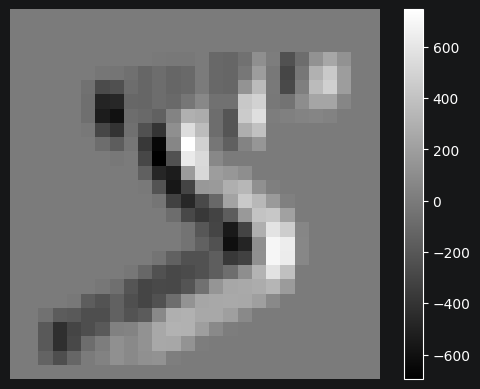

In [71]:
plot_conv_result(filtered_image)

This kernel seems to produce shadows on the left when there's a change from the black background to the white of a digit.

In [76]:
def apply_kernel(image, kernel):
    """
    Apply a kernel to an input image and return the filtered image.
    """
    filtered_image = convolution2d(image, kernel)
    plot_conv_result(filtered_image)

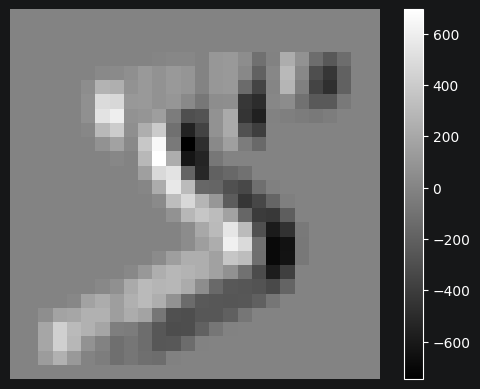

In [78]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
apply_kernel(X_train[0], kernel)

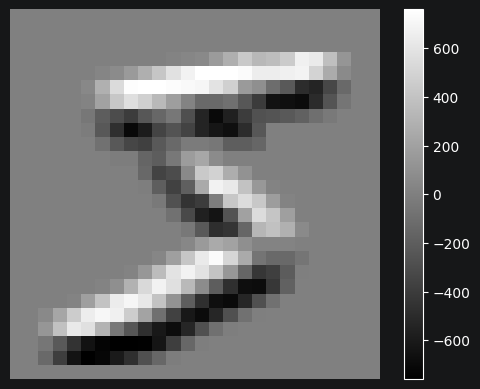

In [79]:
kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
apply_kernel(X_train[0], kernel)

Different kernels will have different efficiencies depending on the input digit. For example, the filter that extracts horiontal lines could be more useful for the below '4' image than the above '5' image:

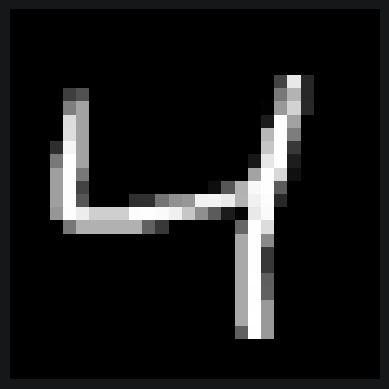

In [82]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

# Set text and bar edges to white for readability
params = {"ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "#161718",
        "axes.edgecolor" : "#161718"}
plt.rcParams.update(params)

plt.imshow(X_train[2], cmap='gray')
plt.axis('off')
plt.show()

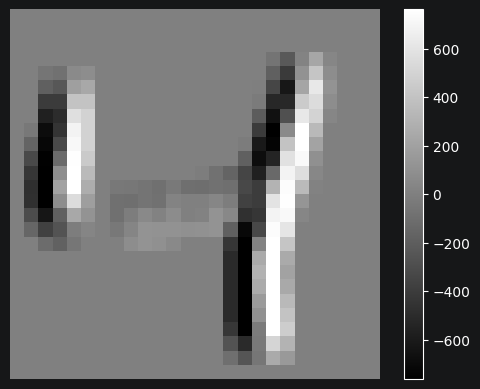

In [ ]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

apply_kernel(X_train[2], kernel)

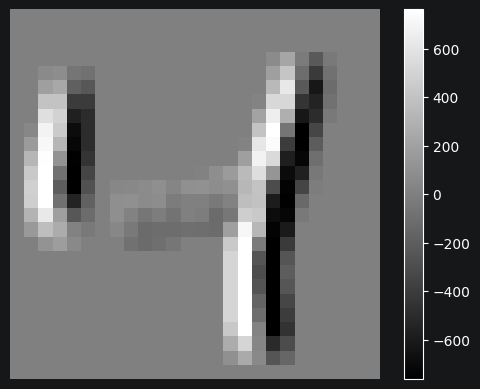

In [ ]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

apply_kernel(X_train[2], kernel)

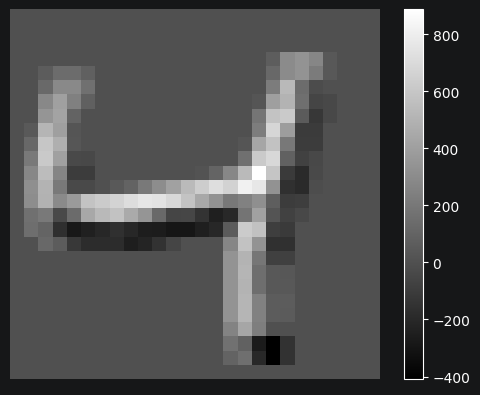

In [ ]:
kernel = np.array([
    [-1, -1, 1],
    [0, 0, 0],
    [1, 1, 1]
])

apply_kernel(X_train[2], kernel)

# Tiger image

C:\Users\asale\AppData\Local\Temp\ipykernel_23084\1695308155.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tiger = iio.imread('tiger.jpg')


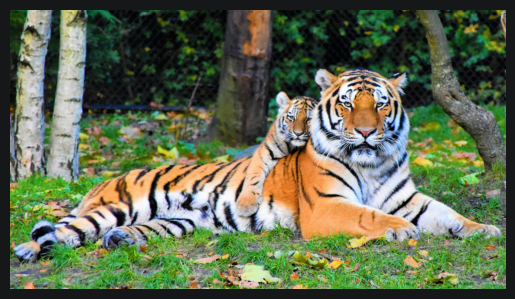

In [17]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

tiger = iio.imread('tiger.jpg')

plt.imshow(tiger)#, cmap='gray')
plt.axis('off')
plt.show()

##  Greyscale image operations

In [129]:
tiger = tiger.mean(axis=2)  # Convert to grayscale
tiger

array([[ 35.33333333,  31.33333333,  28.66666667, ...,  99.        ,
        106.        ,  99.66666667],
       [ 31.33333333,  31.33333333,  34.66666667, ...,  97.33333333,
        101.        ,  90.66666667],
       [ 27.33333333,  27.33333333,  30.66666667, ..., 100.33333333,
         99.33333333,  84.        ],
       ...,
       [104.        , 116.66666667, 135.33333333, ..., 125.33333333,
        104.66666667,  75.        ],
       [117.66666667, 129.66666667, 158.66666667, ..., 104.33333333,
         94.33333333,  89.        ],
       [132.        , 139.33333333, 174.33333333, ...,  88.        ,
         88.33333333, 101.        ]], shape=(2358, 4192))

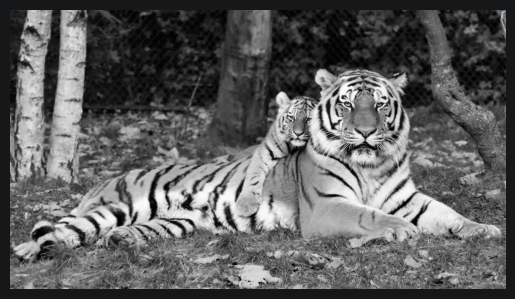

In [141]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

plt.imshow(tiger, cmap='gray')
plt.axis('off')
plt.show()

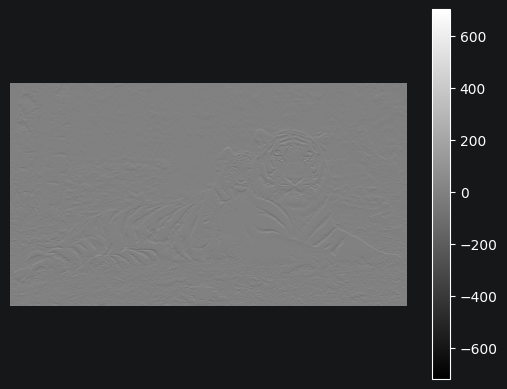

In [135]:
kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

apply_kernel(tiger, kernel)

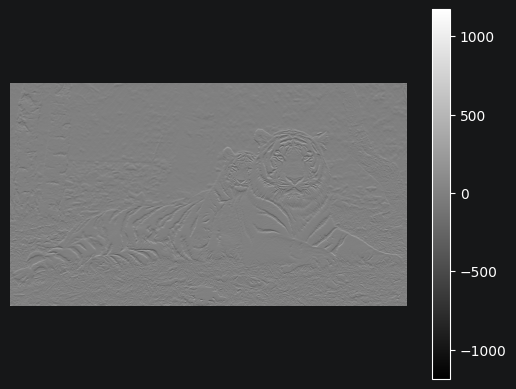

In [137]:
kernel = np.array([
    [-1,-1,-1,-1,-1],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [1,1,1,1,1]
])

apply_kernel(tiger, kernel)

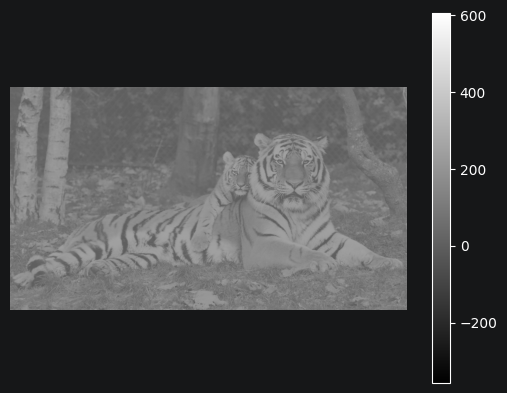

In [159]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

apply_kernel(tiger, kernel)

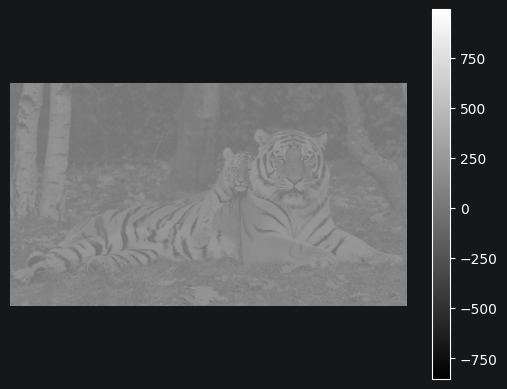

In [158]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

apply_kernel(tiger, kernel)

### Gaussian filters (blurring)

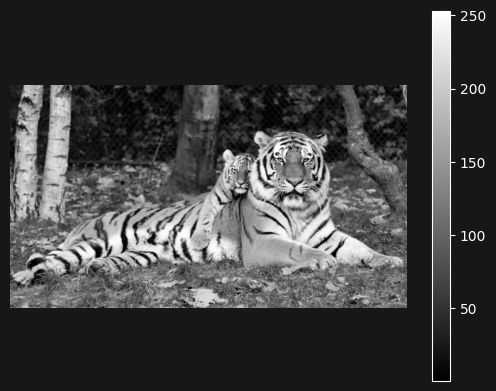

In [143]:
kernel = np.array([
    [1,4,7,4,1],
    [4,16,26,16,4],
    [7,26,41,26,7],
    [4,16,26,16,4],
    [1,4,7,4,1]
])
kernel = kernel / 273

apply_kernel(tiger, kernel)

It looks like the above kernel was not enough to achieve a strong enough blurring effect. In the following block, I resorted to scipy's `gaussian_filter` because my implementation took too long to run.
My initial filter attempt used a blurring kernel of size 25. The second attempt used a blurring kernel of size 49.

In [219]:
def gaussian_kernel(size, sigma):
    """Create a normalized 2D Gaussian kernel."""
    ax = np.arange(-size//2 + 1, size//2 + 1)
    x, y = np.meshgrid(ax, ax)
    kernel = np.exp(-(x**2+y**2) / (2.0*np.pi*sigma**2))
    kernel /= kernel.sum()
    return kernel

# Moderate blur
sigma = 4
kernel_size = int(6 * sigma + 1)

k = gaussian_kernel(kernel_size, sigma=sigma)
blur_conv = convolution2d(tiger, k)

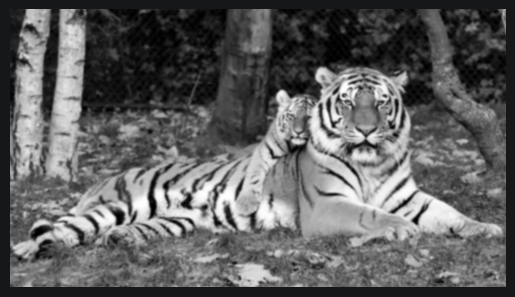

In [220]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

# Set text and bar edges to white for readability
params = {"ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w"}
plt.rcParams.update(params)

im = plt.imshow(blur_conv, cmap='gray')
plt.axis('off')
plt.show()

Second one (more blurring):

In [ ]:
# Moderate blur
sigma = 8
kernel_size = int(6 * sigma + 1)

k = gaussian_kernel(kernel_size, sigma=sigma)

In [213]:
k

array([[5.37643056e-05, 6.04302130e-05, 6.75856048e-05, ...,
        6.75856048e-05, 6.04302130e-05, 5.37643056e-05],
       [6.04302130e-05, 6.79225853e-05, 7.59651304e-05, ...,
        7.59651304e-05, 6.79225853e-05, 6.04302130e-05],
       [6.75856048e-05, 7.59651304e-05, 8.49599734e-05, ...,
        8.49599734e-05, 7.59651304e-05, 6.75856048e-05],
       ...,
       [6.75856048e-05, 7.59651304e-05, 8.49599734e-05, ...,
        8.49599734e-05, 7.59651304e-05, 6.75856048e-05],
       [6.04302130e-05, 6.79225853e-05, 7.59651304e-05, ...,
        7.59651304e-05, 6.79225853e-05, 6.04302130e-05],
       [5.37643056e-05, 6.04302130e-05, 6.75856048e-05, ...,
        6.75856048e-05, 6.04302130e-05, 5.37643056e-05]], shape=(49, 49))

In [214]:
blur_conv = convolution2d(tiger, k)

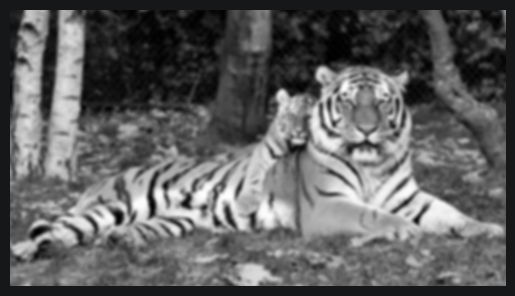

In [ ]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

# Set text and bar edges to white for readability
params = {"ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w"}
plt.rcParams.update(params)

im = plt.imshow(blur_conv, cmap='gray')
plt.axis('off')
plt.show()

## Colourised image operations

C:\Users\asale\AppData\Local\Temp\ipykernel_23084\1695308155.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tiger = iio.imread('tiger.jpg')


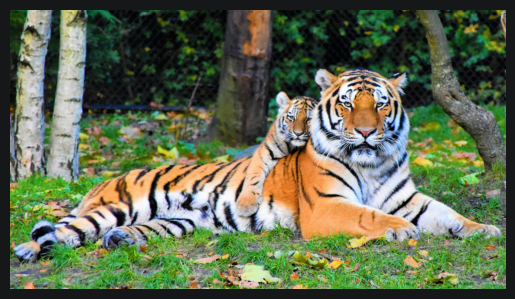

In [18]:
# Set background to match dark theme
plt.figure(facecolor='#161718')

tiger = iio.imread('tiger.jpg')

plt.imshow(tiger)#, cmap='gray')
plt.axis('off')
plt.show()

In [38]:
tiger.shape

(2358, 4192, 3)

We can still use the `convolution2d` function to help us with convolutions for colourised images. This is because, if we store the number of colour channels as the third dimension of the input image, then the `single_convolution` function will recognise that we have multiple colour channels to apply the `np.multiply()` to:

In [25]:
product_multiple_channels = np.multiply(
    # Subset of input image in RGB format (i.e. 3 colour channels)
    np.array([
        [[10, 20, 30],
        [40, 50, 60],
        [70, 80, 90]],

        [[5, 15, 25],
        [35, 45, 55],
        [65, 75, 85]],

        [[2, 4, 6],
        [8, 10, 12],
        [14, 16, 18]]
    ]),

    # Example 3D kernel (i.e. 3x3x3)
    np.array([
        [[1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]],

        [[2, 2, 2],
        [0, 0, 0],
        [-2, -2, -2]],

        [[-1, -1, -1],
        [1, 1, 1],
        [0, 0, 0]]
    ])   
)

product_multiple_channels

array([[[  10,    0,  -30],
        [  40,    0,  -60],
        [  70,    0,  -90]],

       [[  10,   30,   50],
        [   0,    0,    0],
        [-130, -150, -170]],

       [[  -2,   -4,   -6],
        [   8,   10,   12],
        [   0,    0,    0]]])

And `np.sum()` adds the resulting matrices together as you'd expect. This corresponds to adding together the outputs from each colour channel.

In [26]:
np.sum(product_multiple_channels)

np.int64(-402)

But we will make a new plotting function for more choice in colour map:

In [32]:
def plot_conv_result_colour(filtered_image, cmap):
    """
    Display the result of the convolution.
    """
    # Set background to match dark theme
    plt.figure(facecolor='#161718')
    
    # Set text and bar edges to white for readability
    params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
    plt.rcParams.update(params)
    
    im = plt.imshow(filtered_image, cmap=cmap)
    plt.colorbar(im)
    plt.axis('off')
    plt.show()

We can construct a 3D kernel to extract all the areas of green in the tiger image:

In [ ]:
green_filter = np.array(
      [
        # De-incentivise red
        [[-1,-1,-1],
        [-1,-1,-1],
        [-1,-1,-1]],

        # Promote green
        [[1,1,1],
        [1,1,1],
        [1,1,1]],

       # De-incentivise blue
        [[-1,-1,-1],
        [-1,-1,-1],
        [-1,-1,-1]],
    ]
)


(3, 3, 3)


In [30]:
filtered_image = convolution2d(tiger, green_filter.transpose(1,2,0))

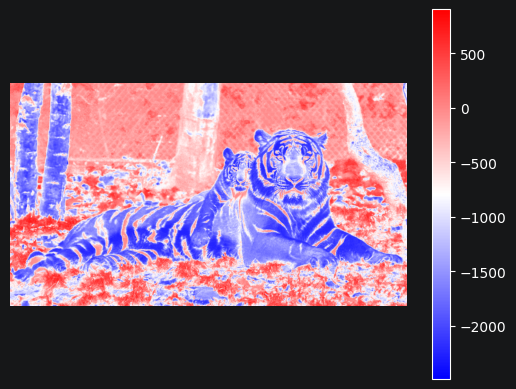

In [34]:
plot_conv_result_colour(filtered_image, cmap='bwr')

We can try another green filter, this time modifying the values so that the overall sum of elements is 0. This seems to help accentuate the greens in the image:

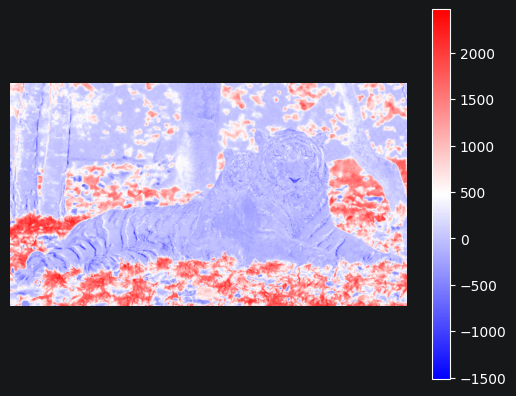

In [36]:
green_filter = np.array(
      [
        # De-incentivise red
        [[-1,-1,-1],
        [-1,-1,-1],
        [-1,-1,-1]],

        # Promote green
        [[2,2,2],
        [2,2,2],
        [2,2,2]],

       # De-incentivise blue
        [[-1,-1,-1],
        [-1,-1,-1],
        [-1,-1,-1]],
    ]
)
filtered_image = convolution2d(tiger, green_filter.transpose(1,2,0))
plot_conv_result_colour(filtered_image, cmap='bwr')


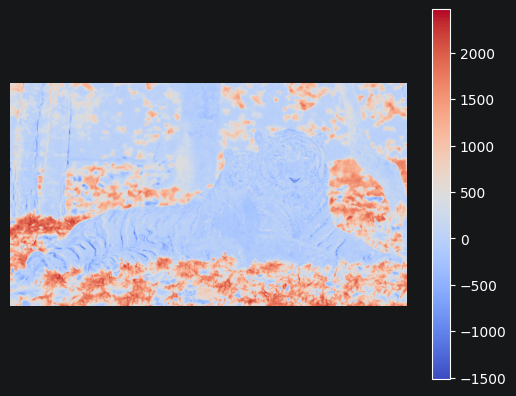

In [40]:
plot_conv_result_colour(filtered_image, cmap='coolwarm')

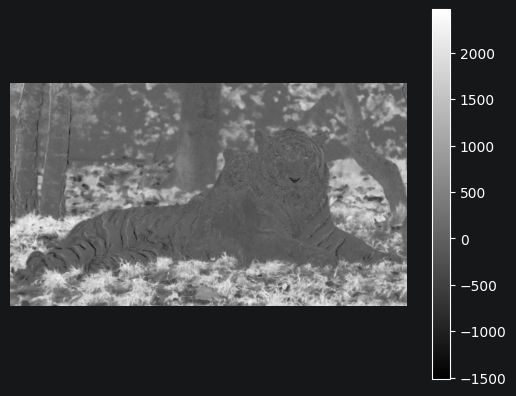

In [37]:
plot_conv_result_colour(filtered_image, cmap='grey')

In [39]:
filtered_image.shape

(2356, 4190)